In [ ]:
!pip install git+https://github.com/datamllab/rlcard

  Cloning https://github.com/datamllab/rlcard to /tmp/pip-req-build-rt6n6r_7
  Running command git clone -q https://github.com/datamllab/rlcard /tmp/pip-req-build-rt6n6r_7
  Created wheel for rlcard: filename=rlcard-0.2.5-cp36-none-any.whl size=6783166 sha256=223b7c9e98d692d8c4779b389775b2aca3b55555aca2ba0f34c4305032663880
  Stored in directory: /tmp/pip-ephem-wheel-cache-osk489sr/wheels/b3/e1/32/6535ad7ff9142e4c031af97e237e4df3e4ab14e86194738ac4
Successfully built rlcard


In [ ]:
%tensorflow_version 1.x # for using tensorflow.contrib
import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # for using tensorflow.contrib`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.





Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.





Instructions for updating:
Please switch to tf.train.get_global_step

INFO:tensorflow:Restoring parameters from /usr/local/lib/python3.6/dist-packages/rlcard/models/pretrained/leduc_holdem_nfsp/model
Iteration 0
----------------------------------------
  timestep     |  

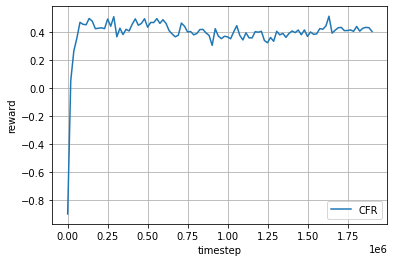

In [ ]:
import numpy as np

import rlcard
from rlcard.agents import CFRAgent
from rlcard import models
from rlcard.utils import seeding, tournament
from rlcard.utils import Logger

# Make environment and enable human mode
env = rlcard.make('leduc-holdem', config={'seed': 0, 'allow_step_back':True})
eval_env = rlcard.make('leduc-holdem', config={'seed': 0})

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 100
save_plot_every = 1000
evaluate_num = 10000
episode_num = 10000

# The paths for saving the logs and learning curves
log_dir = './experiments/leduc_holdem_cfr_result/'

# Set a global seed
seeding.create_seed(0)

# Initilize CFR Agent
agent = CFRAgent(env)
agent.load()  # If we have saved model, we first load the model


# Evaluate CFR against pre-trained NFSP
eval_env.set_agents([agent, models.load('leduc-holdem-nfsp').agents[0]])

# Init a Logger to plot the learning curve
logger = Logger(log_dir)

for episode in range(episode_num):
    agent.train()
    print('\rIteration {}'.format(episode), end='')
    # Evaluate the performance. Play with NFSP agents.
    if episode % evaluate_every == 0:
        agent.save() # Save model
        logger.log_performance(env.timestep, tournament(eval_env, evaluate_num)[0])

# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('CFR')